In [1]:
import pandas as pd
import numpy as np
import statistics as st
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#  checking what are all the columns in the dataset 

df = pd.read_csv("E:/downloads/train-chennai-sale.csv")
pd.set_option('display.max_columns',None)
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,Commercial,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,Commercial,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,Commercial,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,18-03-1988,Others,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,Others,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [3]:
# let's check the shape of the dataset

df.shape

(7109, 22)

In [4]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [5]:
# it's not neccessary to change the columns to lowercase.
# renaming the columns to lower case

def rename_col(dataframe):
    cols = [i.lower() for i in dataframe.columns]
    dataframe.columns = cols
    return dataframe

In [6]:
df = rename_col(df)
df.columns             # columns changed to lower case

Index(['prt_id', 'area', 'int_sqft', 'date_sale', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'sale_cond', 'park_facil', 'date_build',
       'buildtype', 'utility_avail', 'street', 'mzzone', 'qs_rooms',
       'qs_bathroom', 'qs_bedroom', 'qs_overall', 'reg_fee', 'commis',
       'sales_price'],
      dtype='object')

In [7]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 7109 rows and 22 columns


In [8]:
# now let's drop the columns which is not affecting the feature

df.drop(columns=['prt_id','reg_fee','commis'],inplace=True)

print(f'After deleting the columns the dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

After deleting the columns the dataset contains 7109 rows and 19 columns


# DATA CLEANING

In [9]:
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

col_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'}) 

# Sum the null values of each variable, transpose them(row name (null values (nb))) and append them to the col_info dataframe
col_info = col_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))

# Divide the sum null values by the total number of rows of our dataset, transpose and append to the col_info dataframe
# This will give us the percentage value of missing data from that column/variable
col_info = col_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.rename
                           (index={0:'null values (%)'}))
col_info

,area,int_sqft,date_sale,dist_mainroad,n_bedroom,n_bathroom,n_room,sale_cond,park_facil,date_build,buildtype,utility_avail,street,mzzone,qs_rooms,qs_bathroom,qs_bedroom,qs_overall,sales_price
column type,object,int64,object,int64,float64,float64,int64,object,object,object,object,object,object,object,float64,float64,float64,float64,int64
null values (nb),0,0,0,0,1,5,0,0,0,0,0,0,0,0,0,0,0,48,0
null values (%),0.0,0.0,0.0,0.0,0.014067,0.070333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6752,0.0


In [10]:
# filling the categorical null values with mode and continuous null values with mean

df = df.fillna({'n_bedroom':st.mode(df['n_bedroom']),
               'n_bathroom':st.mode(df['n_bathroom']),
               'qs_overall':df['qs_overall'].mean()})

df.isnull().sum()

area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
sales_price      0
dtype: int64

In [11]:
# checking whether the data types are in correct format

df.dtypes

area              object
int_sqft           int64
date_sale         object
dist_mainroad      int64
n_bedroom        float64
n_bathroom       float64
n_room             int64
sale_cond         object
park_facil        object
date_build        object
buildtype         object
utility_avail     object
street            object
mzzone            object
qs_rooms         float64
qs_bathroom      float64
qs_bedroom       float64
qs_overall       float64
sales_price        int64
dtype: object

In [12]:
# here date_sale and date_build are in wrong format / n_bedroom and n_bathroom are in wrong format
warnings.simplefilter(action='ignore',category=FutureWarning)

df['date_sale'] = pd.to_datetime(df['date_sale'])
df['date_build'] = pd.to_datetime(df['date_build'])

df['n_bedroom'] = df['n_bedroom'].astype(int)
df['n_bathroom'] = df['n_bathroom'].astype(int)

df.dtypes

C:\Users\KAPIL\AppData\Local\Temp\ipykernel_14988\2750934776.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_sale'] = pd.to_datetime(df['date_sale'])
C:\Users\KAPIL\AppData\Local\Temp\ipykernel_14988\2750934776.py:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['date_build'] = pd.to_datetime(df['date_build'])


area                     object
int_sqft                  int64
date_sale        datetime64[ns]
dist_mainroad             int64
n_bedroom                 int32
n_bathroom                int32
n_room                    int64
sale_cond                object
park_facil               object
date_build       datetime64[ns]
buildtype                object
utility_avail            object
street                   object
mzzone                   object
qs_rooms                float64
qs_bathroom             float64
qs_bedroom              float64
qs_overall              float64
sales_price               int64
dtype: object

In [13]:
# here i'm creating a new column to calculate the house age
# this new column is called derived column

df['house_age'] = df['date_sale'].dt.year - df['date_build'].dt.year
df['house_age'].head()

0    44
1    11
2    20
3    22
4    30
Name: house_age, dtype: int64

In [14]:
# now we don't need the date_sale and date_build columns

df.drop(columns = ['date_sale','date_build'], inplace = True)

In [15]:
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64,float64,int32
0,7,5,4,2


In [16]:
# checking how many categories are in object data

obj_dt_count = [var for var in df.columns if df[var].dtype == 'object']
obj_dt_count

['area',
 'sale_cond',
 'park_facil',
 'buildtype',
 'utility_avail',
 'street',
 'mzzone']

In [17]:
for i in obj_dt_count:
    print(f'column "{i}" is divided into {len(df[i].value_counts())} categories')

column "area" is divided into 17 categories
column "sale_cond" is divided into 9 categories
column "park_facil" is divided into 3 categories
column "buildtype" is divided into 5 categories
column "utility_avail" is divided into 5 categories
column "street" is divided into 5 categories
column "mzzone" is divided into 6 categories


In [18]:
# checking for column area 

df['area'].value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: area, dtype: int64

In [19]:
# we have lots of spelling mistakes let's clean them up

df['area'] = df['area'].replace({'Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet','Karapakam':'Karapakkam',
                                 'KKNagar':'KK Nagar','Velchery':'Velachery','Ana Nagar':'Anna Nagar','Ann Nagar':'Anna Nagar',
                                 'Adyr':'Adyar','TNagar':'T Nagar'})
                                                              
df['area'].value_counts().T

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: area, dtype: int64

In [20]:
# checking for column sale_cond

df['sale_cond'].value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: sale_cond, dtype: int64

In [21]:
# here also we have spelling mistakes

df['sale_cond'] = df['sale_cond'].replace({'Adj Land':'AdjLand','PartiaLl':'Partial','Partiall':'Partial','Ab Normal':'AbNormal'})

df['sale_cond'].value_counts().T

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: sale_cond, dtype: int64

In [22]:
# checking for column park_facil

df['park_facil'].value_counts()

Yes    3587
No     3520
Noo       2
Name: park_facil, dtype: int64

In [23]:
df['park_facil'] = df['park_facil'].replace({'Noo':'No'})

df['park_facil'].value_counts().T

Yes    3587
No     3522
Name: park_facil, dtype: int64

In [24]:
# checking for column buildtype

df['buildtype'].value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: buildtype, dtype: int64

In [25]:
df['buildtype'] = df['buildtype'].replace({'Comercial':'Commercial','Other':'Others'})

df['buildtype'].value_counts().T

House         2444
Others        2336
Commercial    2329
Name: buildtype, dtype: int64

In [26]:
# checking for column utility_avail

df['utility_avail'].value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: utility_avail, dtype: int64

In [27]:
df['utility_avail'] = df['utility_avail'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'])

df['utility_avail'].value_counts().T

No Sewer    3700
AllPub      1887
ELO         1522
Name: utility_avail, dtype: int64

In [28]:
# checking for column street 

df['street'].value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: street, dtype: int64

In [29]:
df['street'] = df['street'].replace({'Pavd':'Paved','NoAccess':'No Access'})

df['street'].value_counts().T

Paved        2572
Gravel       2520
No Access    2017
Name: street, dtype: int64

In [30]:
# checking for column mzzone

df['mzzone'].value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: mzzone, dtype: int64

In [31]:
# here there is no spelling mistakes

In [32]:
# After spelling mistakes are corrected

cor_obj_dt_col = [var for var in df.columns if df[var].dtype == 'object']
for i in cor_obj_dt_col:
    print(f'column "{i}" is divided into {len(df[i].value_counts())} categories')

column "area" is divided into 7 categories
column "sale_cond" is divided into 5 categories
column "park_facil" is divided into 2 categories
column "buildtype" is divided into 3 categories
column "utility_avail" is divided into 3 categories
column "street" is divided into 3 categories
column "mzzone" is divided into 6 categories


In [33]:
# removing duplicates

df = df.drop_duplicates()

df.shape

(7109, 18)

# EDA

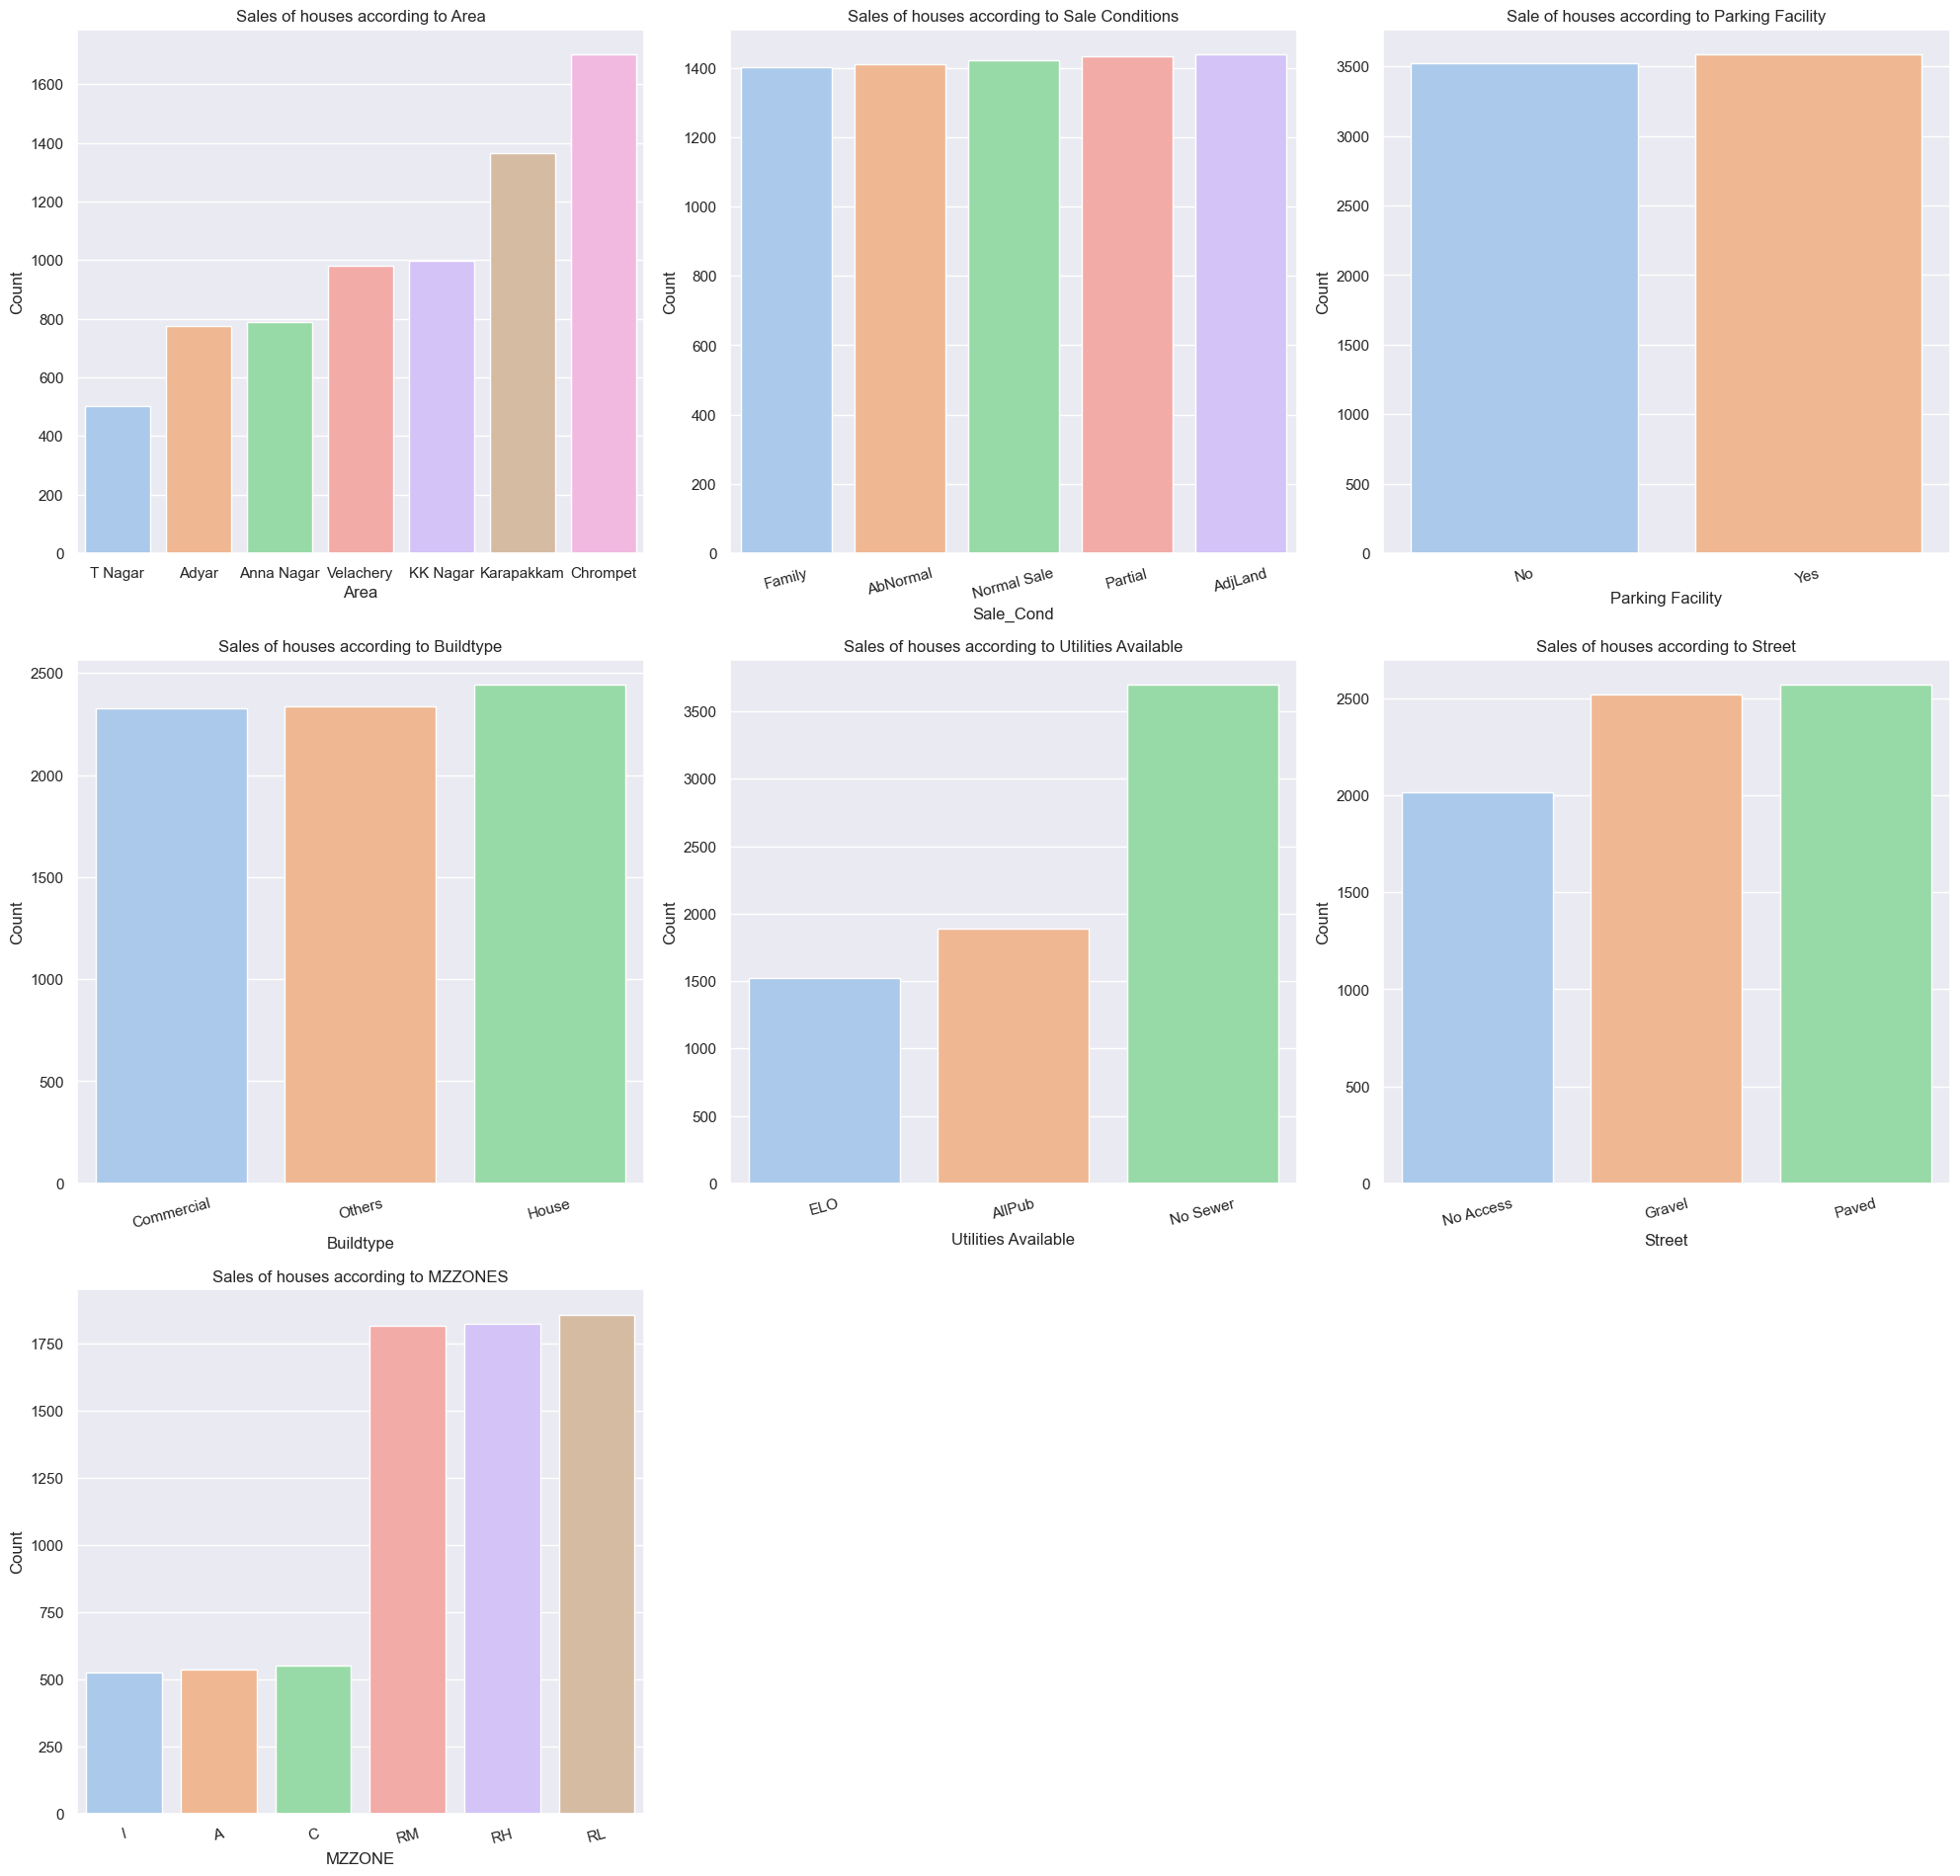

In [34]:
#plotting count plots for all the categorical columns

sns.set_theme(style='darkgrid',palette='pastel')

plt.figure(figsize=(20,25))
plt.subplot(431)
sns.countplot(df['area'],order=df['area'].value_counts().index[::-1])
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Sales of houses according to Area')

plt.subplot(432)
sns.countplot(df['sale_cond'],order=df['sale_cond'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Sale_Cond')
plt.ylabel('Count')
plt.title('Sales of houses according to Sale Conditions')

plt.subplot(433)
sns.countplot(df['park_facil'],order=df['park_facil'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Parking Facility')
plt.ylabel('Count')
plt.title('Sale of houses according to Parking Facility')

plt.subplot(434)
sns.countplot(df['buildtype'],order=df['buildtype'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Buildtype')
plt.ylabel('Count')
plt.title('Sales of houses according to Buildtype')

plt.subplot(435)
sns.countplot(df['utility_avail'],order=df['utility_avail'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Utilities Available')
plt.ylabel('Count')
plt.title('Sales of houses according to Utilities Available')

plt.subplot(436)
sns.countplot(df['street'],order=df['street'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('Street')
plt.ylabel('Count')
plt.title('Sales of houses according to Street')

plt.subplot(437)
sns.countplot(df['mzzone'],order=df['mzzone'].value_counts().index[::-1])
plt.xticks(rotation=15)
plt.xlabel('MZZONE')
plt.ylabel('Count')
plt.title('Sales of houses according to MZZONES')

plt.tight_layout()

In [35]:
area_order = df.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area']
sale_cond_order = df.groupby('sale_cond')['sales_price'].mean().reset_index().sort_values('sales_price')['sale_cond']
park_facil_order = df.groupby('park_facil')['sales_price'].mean().reset_index().sort_values('sales_price')['park_facil']
buildtype_order = df.groupby('buildtype')['sales_price'].mean().reset_index().sort_values('sales_price')['buildtype']
utility_avail_order = df.groupby('utility_avail')['sales_price'].mean().reset_index().sort_values('sales_price')['utility_avail']
street_order = df.groupby('street')['sales_price'].mean().reset_index().sort_values('sales_price')['street']
mzzone_order = df.groupby('mzzone')['sales_price'].mean().reset_index().sort_values('sales_price')['mzzone']

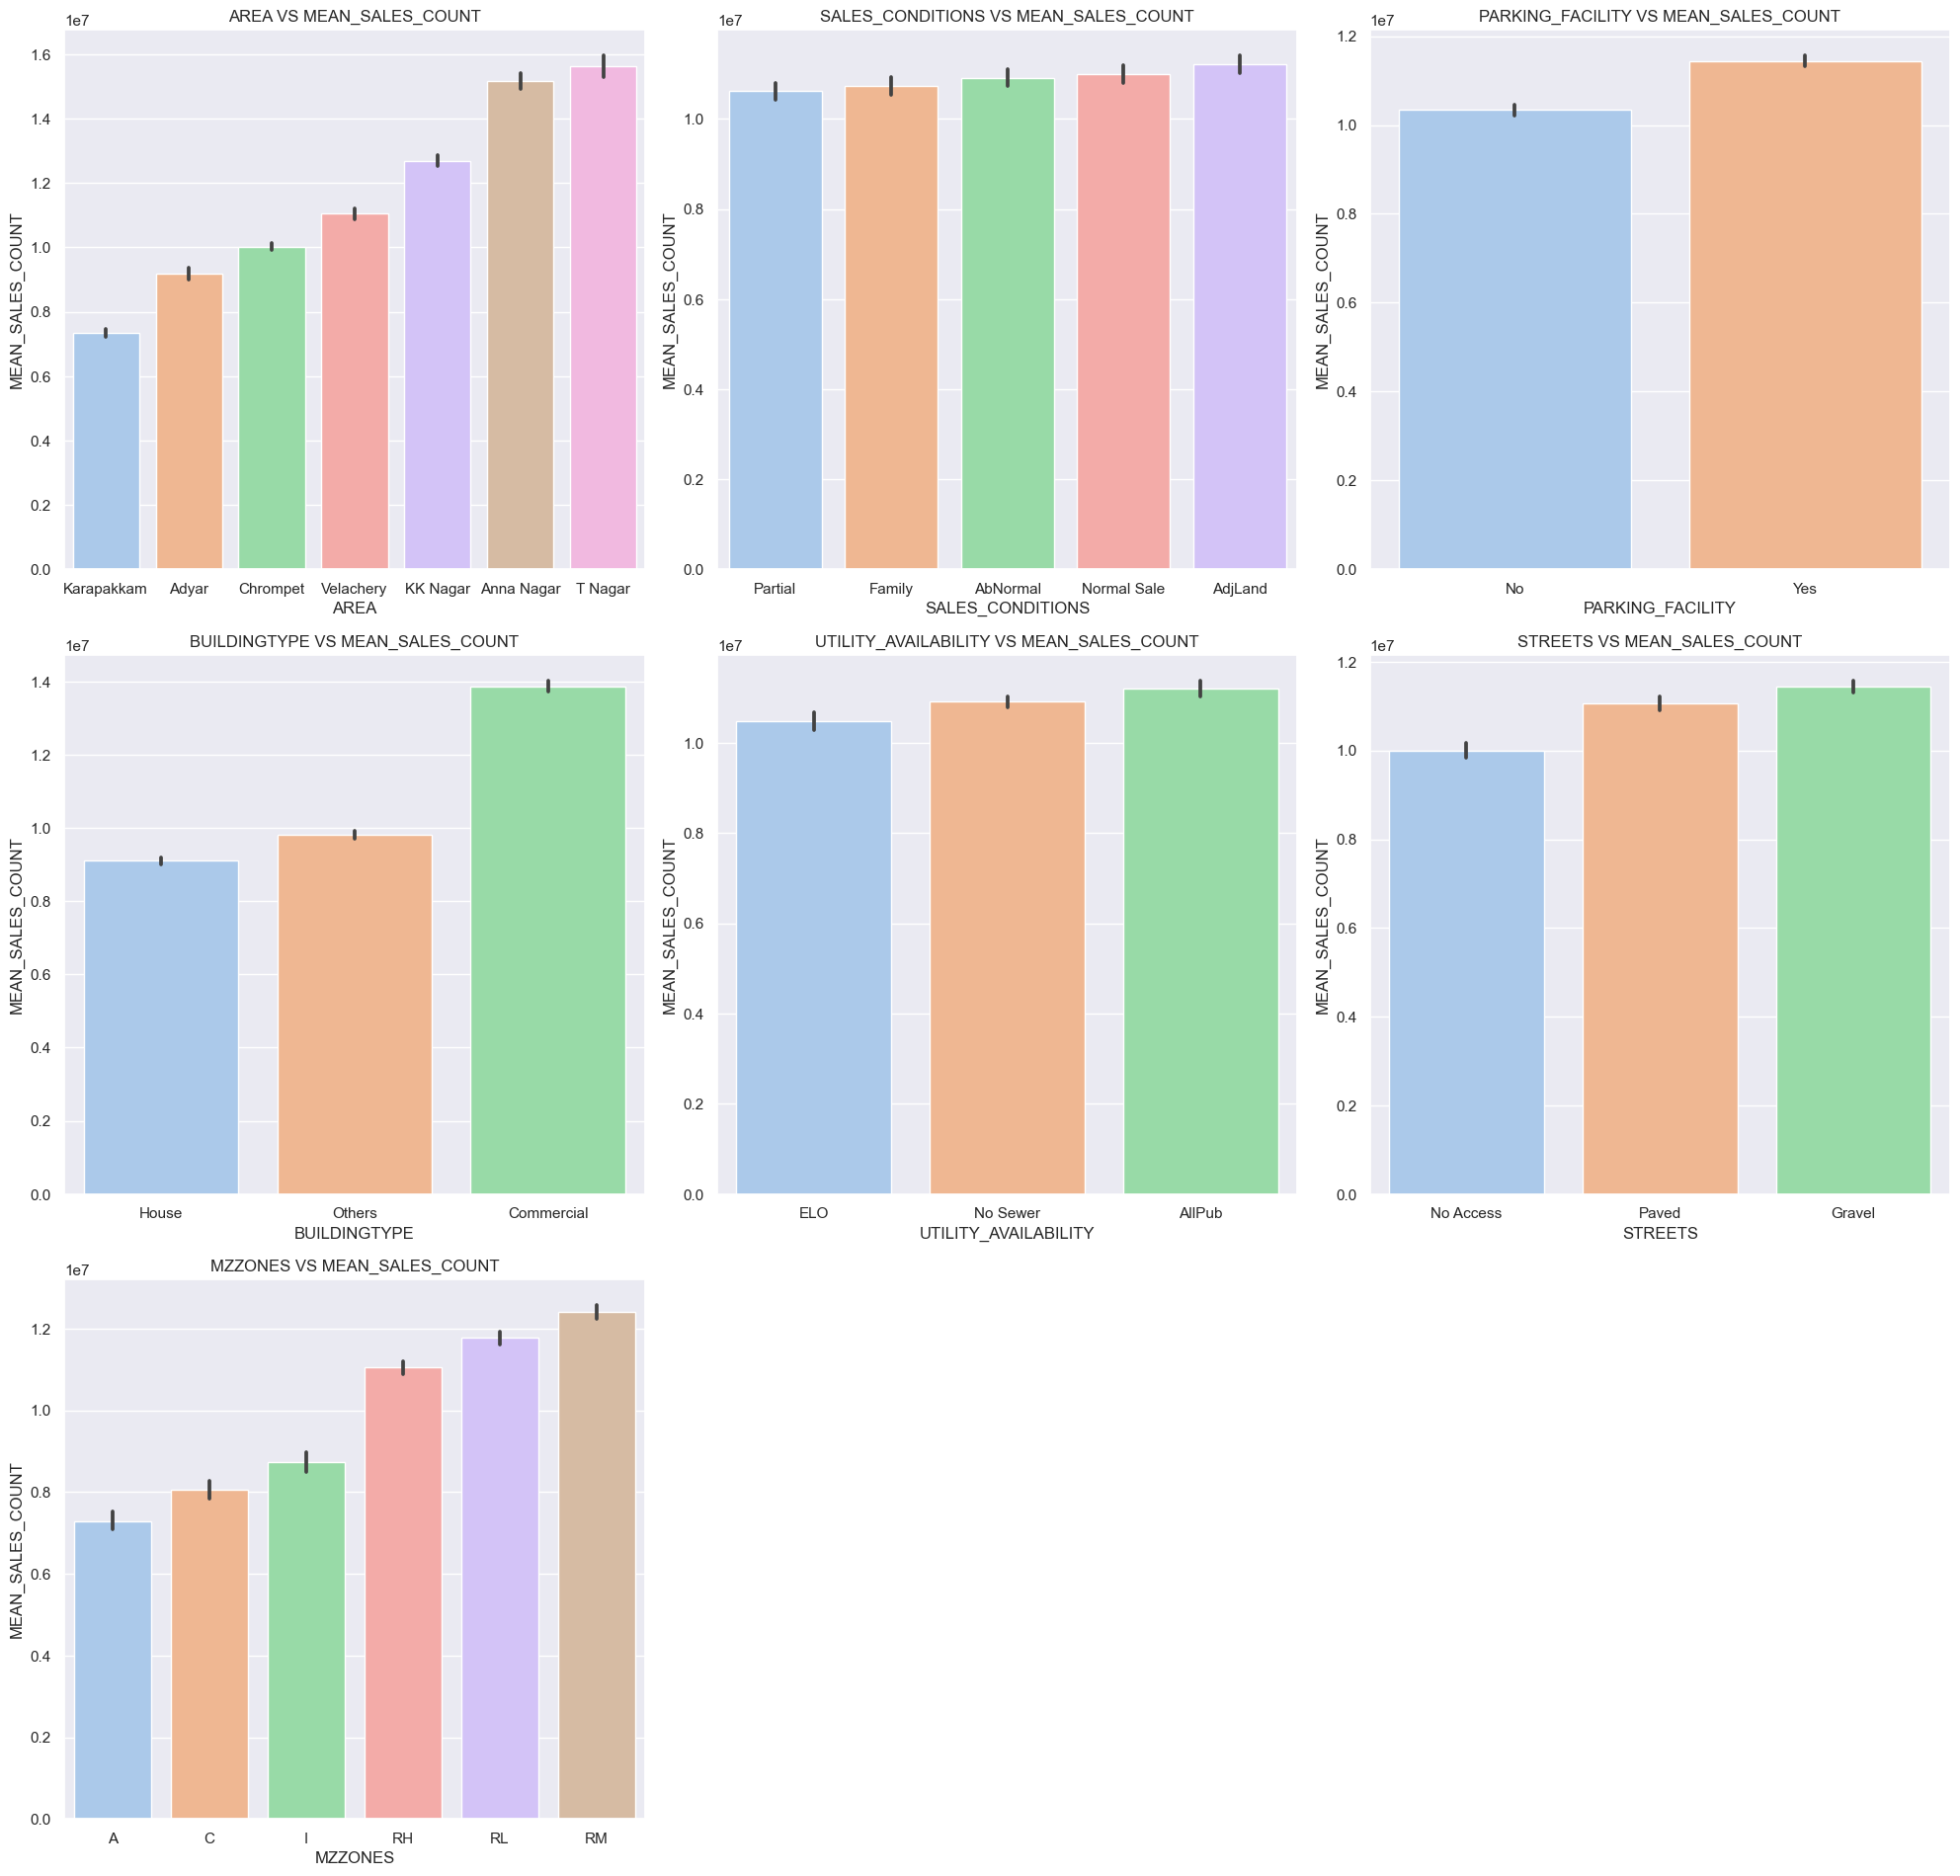

In [36]:
# plotting the columns with mean sales price

plt.figure(figsize=(20,25))

plt.subplot(431)
sns.barplot(df['area'],df['sales_price'],order=area_order)
plt.xlabel('AREA')
plt.ylabel('MEAN_SALES_COUNT')
plt.title('AREA VS MEAN_SALES_COUNT')

plt.subplot(432)
sns.barplot(df['sale_cond'],df['sales_price'],order=sale_cond_order)
plt.xlabel('SALES_CONDITIONS')
plt.ylabel('MEAN_SALES_COUNT')
plt.title('SALES_CONDITIONS VS MEAN_SALES_COUNT')

plt.subplot(433)
sns.barplot(df['park_facil'],df['sales_price'],order=park_facil_order)
plt.xlabel('PARKING_FACILITY')
plt.ylabel('MEAN_SALES_COUNT')
plt.title('PARKING_FACILITY VS MEAN_SALES_COUNT')

plt.subplot(434)
sns.barplot(df['buildtype'],df['sales_price'],order=buildtype_order)
plt.xlabel('BUILDINGTYPE')
plt.ylabel('MEAN_SALES_COUNT')
plt.title('BUILDINGTYPE VS MEAN_SALES_COUNT')

plt.subplot(435)
sns.barplot(df['utility_avail'],df['sales_price'],order=utility_avail_order)
plt.xlabel('UTILITY_AVAILABILITY')
plt.ylabel('MEAN_SALES_COUNT')
plt.title('UTILITY_AVAILABILITY VS MEAN_SALES_COUNT')

plt.subplot(436)
sns.barplot(df['street'],df['sales_price'],order=street_order)
plt.xlabel('STREETS')
plt.ylabel('MEAN_SALES_COUNT')
plt.title('STREETS VS MEAN_SALES_COUNT')

plt.subplot(437)
sns.barplot(df['mzzone'],df['sales_price'],order=mzzone_order)
plt.xlabel('MZZONES')
plt.ylabel('MEAN_SALES_COUNT')
plt.title('MZZONES VS MEAN_SALES_COUNT')

plt.tight_layout()

In [37]:
col_ty_int = [var for var in df.columns if df[var].dtype=='int32' or df[var].dtype=='int64']
col_ty_int

['int_sqft',
 'dist_mainroad',
 'n_bedroom',
 'n_bathroom',
 'n_room',
 'sales_price',
 'house_age']

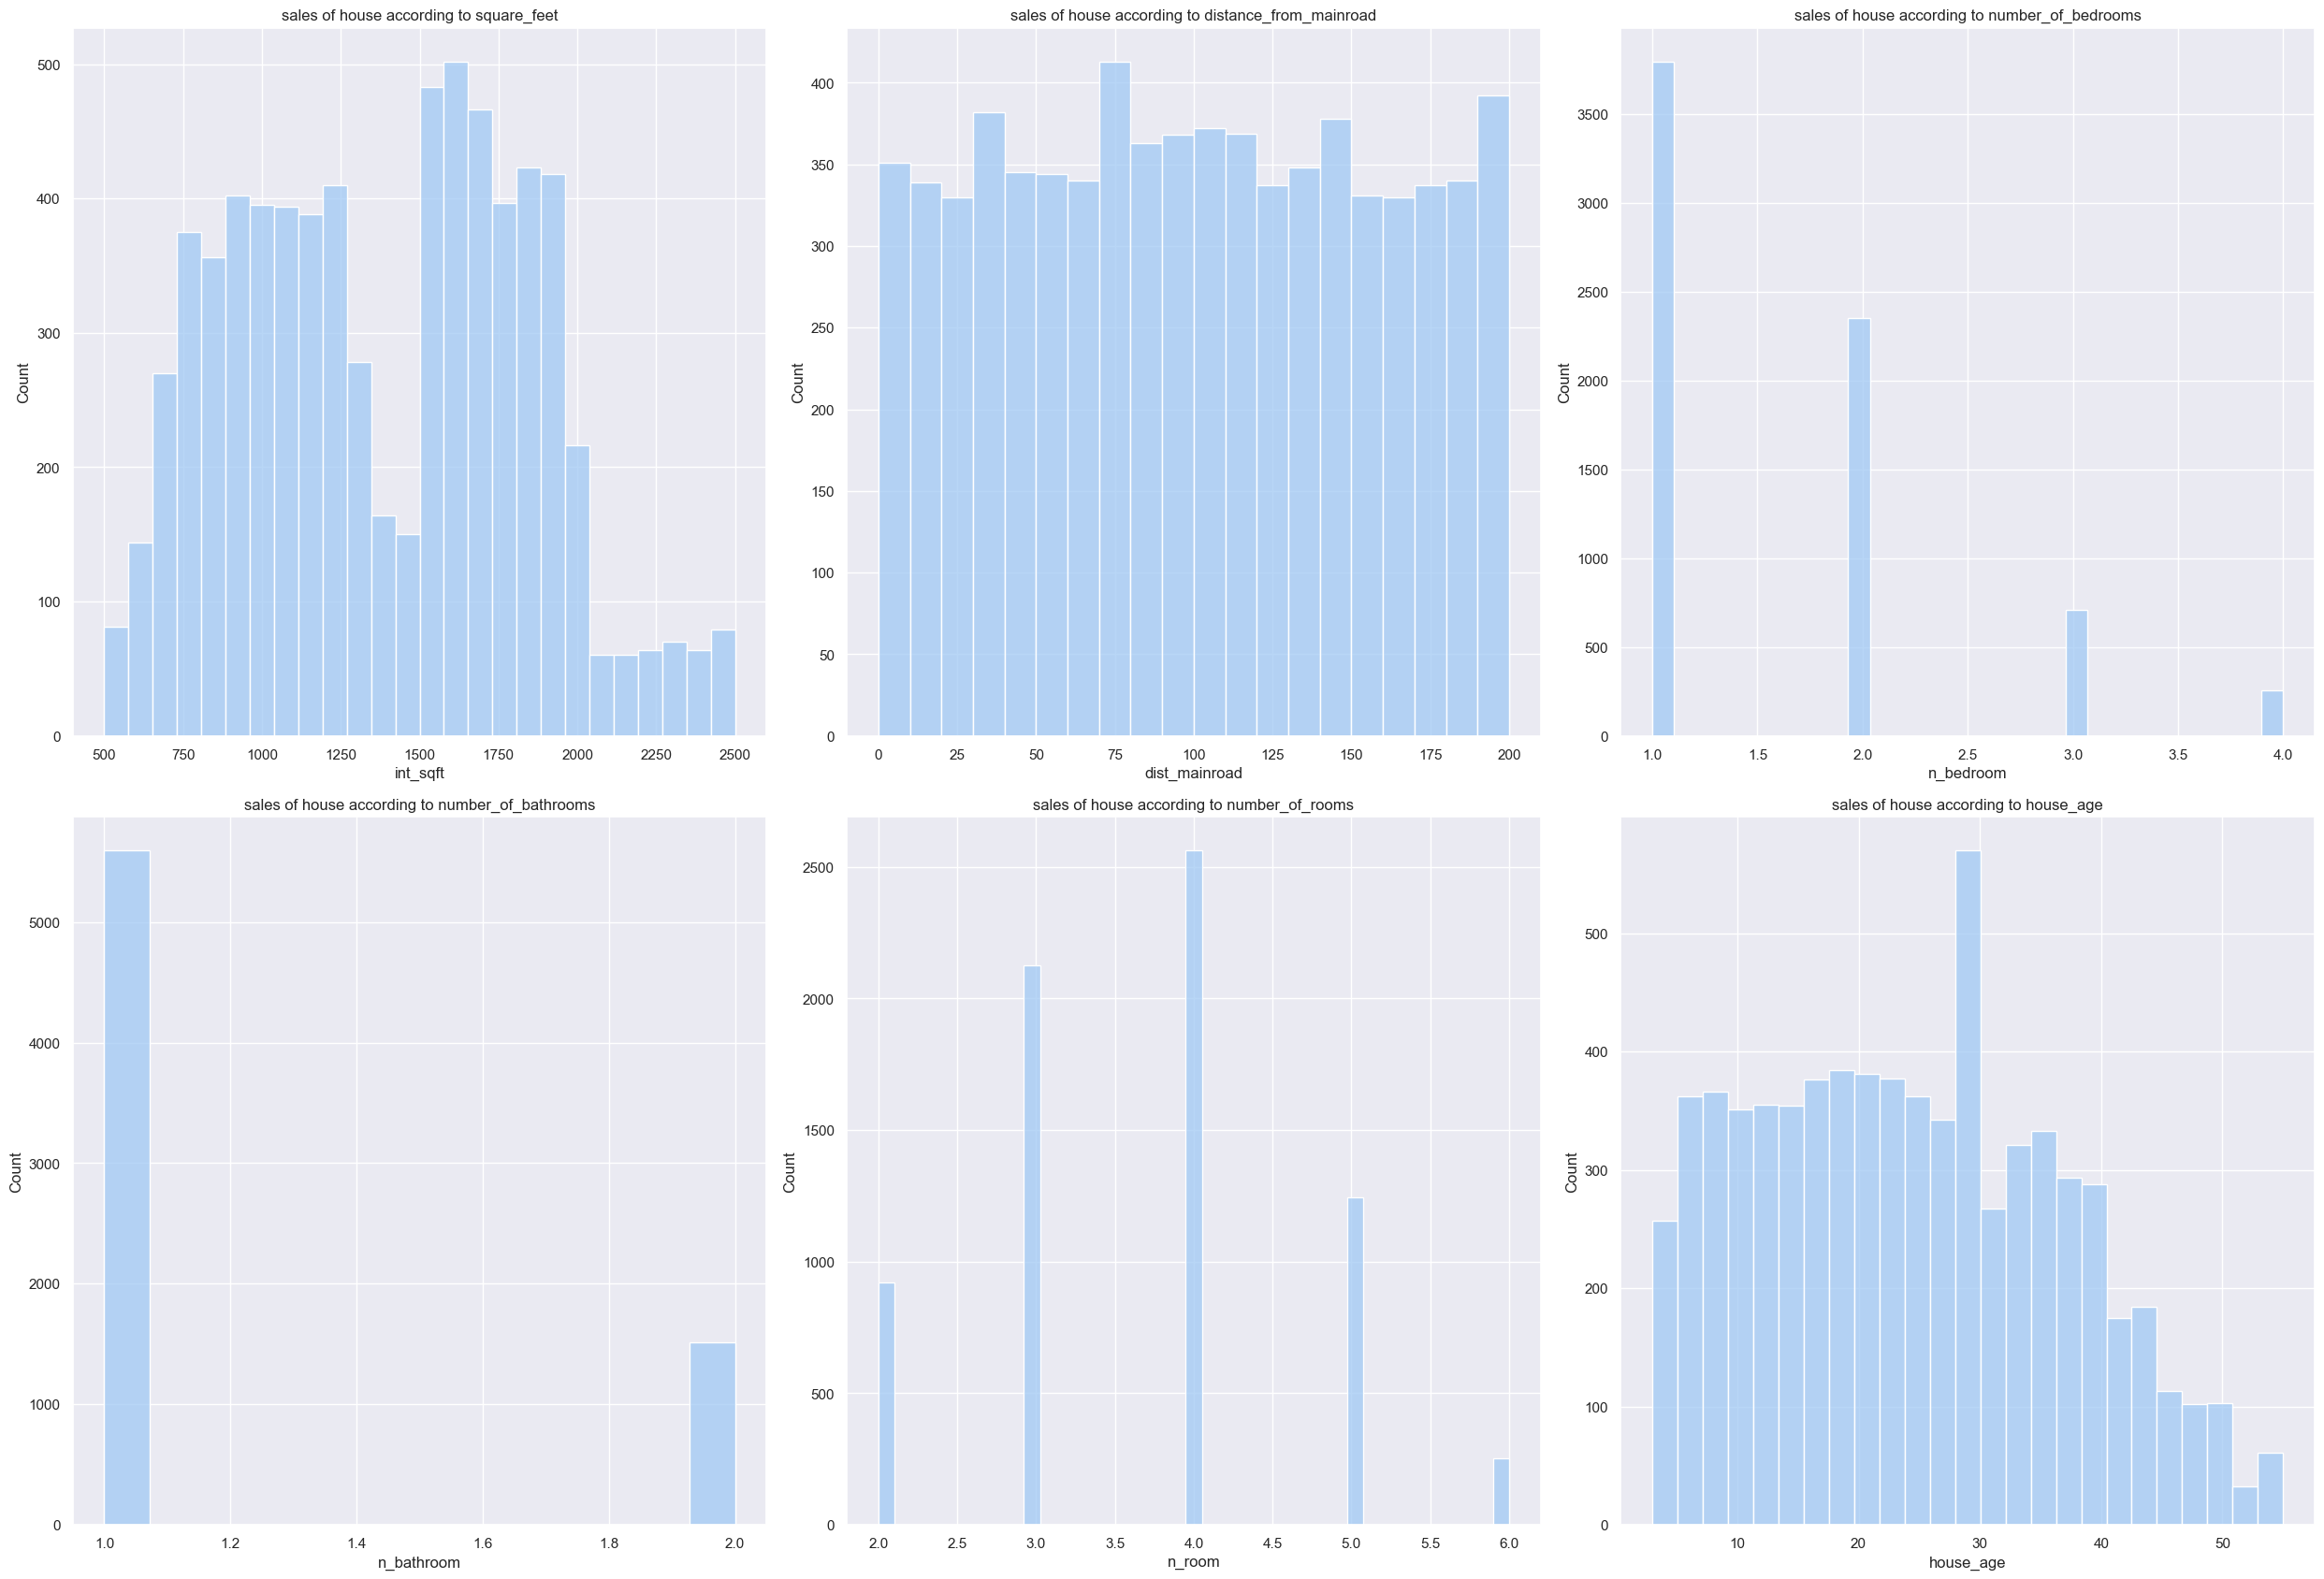

In [38]:
# let's plot the distribution of continuous columns

plt.figure(figsize=(25,25))
plt.subplot(331)
sns.histplot(df['int_sqft'])
plt.title('sales of house according to square_feet')

plt.subplot(332)
sns.histplot(df['dist_mainroad'])
plt.title('sales of house according to distance_from_mainroad')

plt.subplot(333)
sns.histplot(df['n_bedroom'])
plt.title('sales of house according to number_of_bedrooms')

plt.subplot(334)
sns.histplot(df['n_bathroom'])
plt.title('sales of house according to number_of_bathrooms')

plt.subplot(335)
sns.histplot(df['n_room'])
plt.title('sales of house according to number_of_rooms')

plt.subplot(336)
sns.histplot(df['house_age'])
plt.title('sales of house according to house_age')

plt.tight_layout()

Text(0.5, 1.0, 'house age vs sales price')

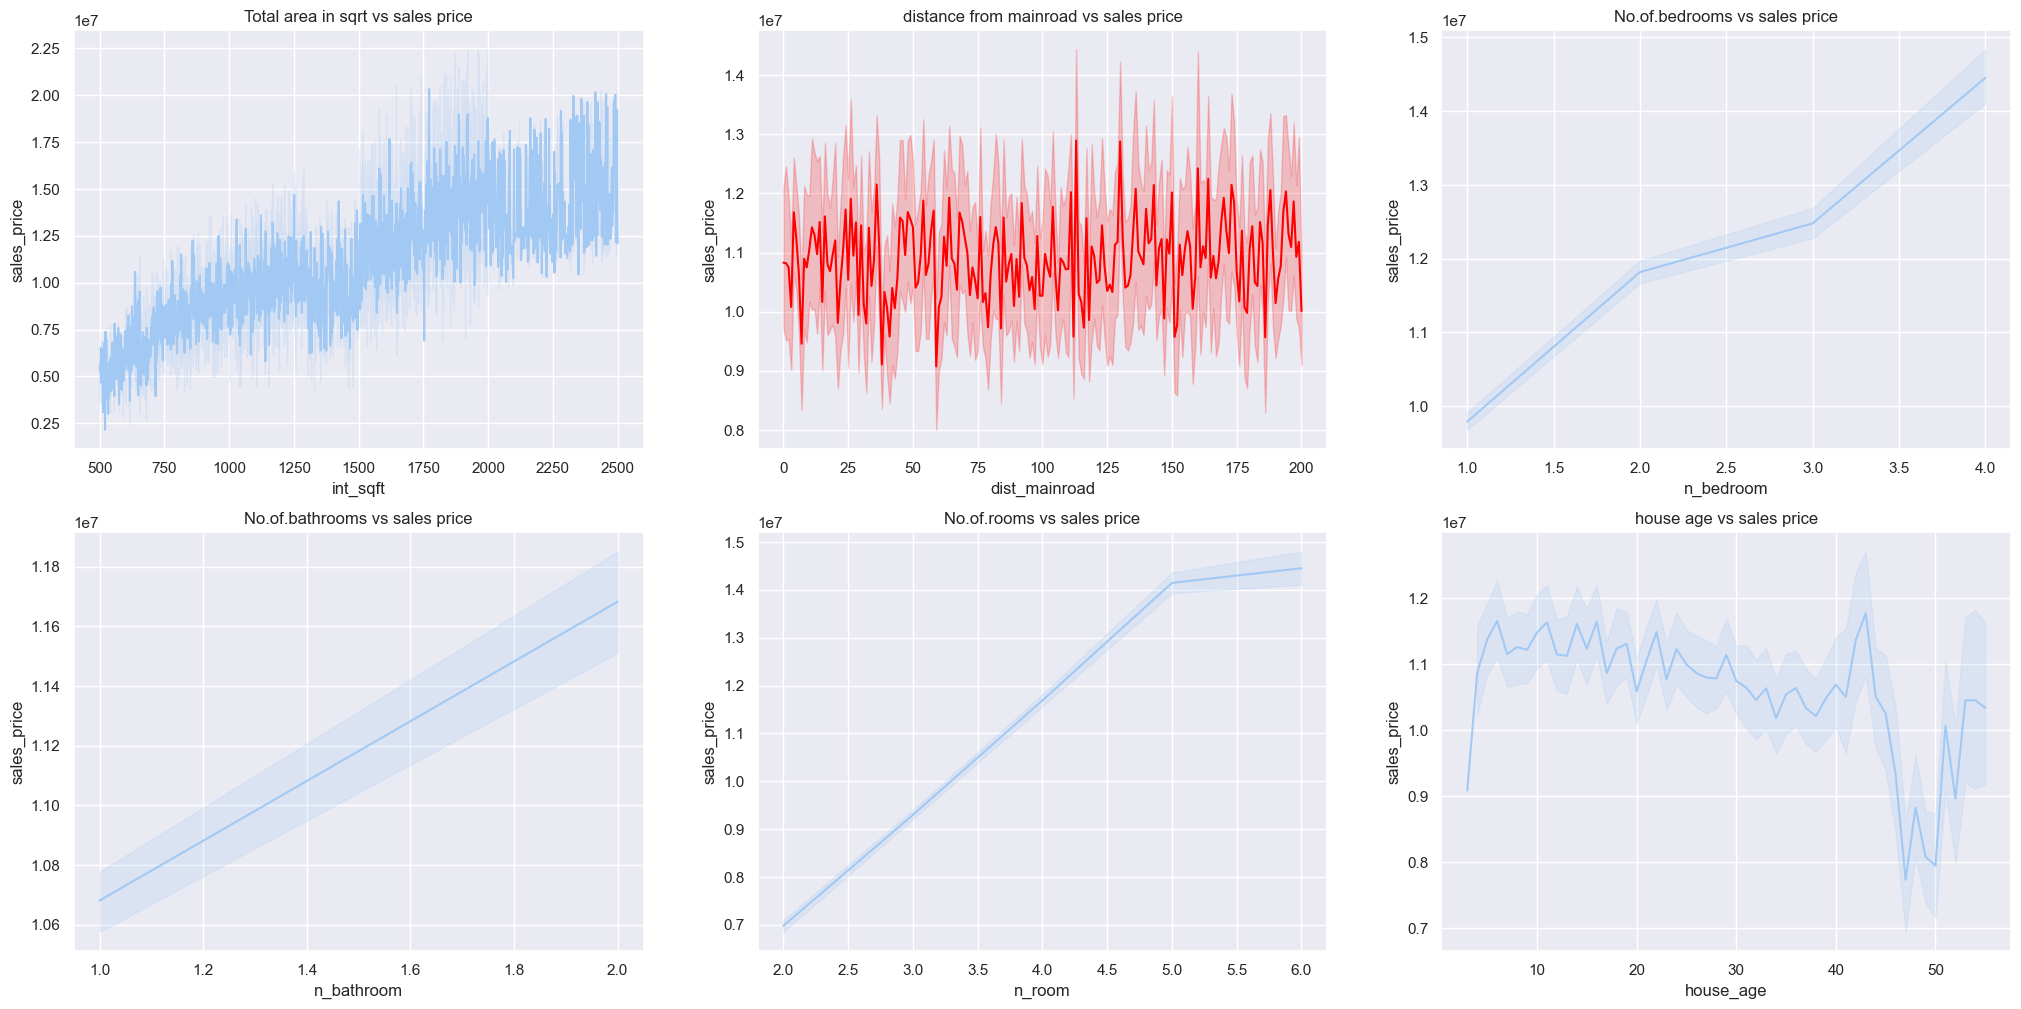

In [39]:
# let's plot the distribution of continuous column vs target column

plt.figure(figsize=(25,25))
plt.subplot(431)
sns.lineplot(df['int_sqft'],df['sales_price'])
plt.title('Total area in sqrt vs sales price')

plt.subplot(432)
sns.lineplot(df['dist_mainroad'],df['sales_price'],color='red')
plt.title('distance from mainroad vs sales price')

plt.subplot(433)
sns.lineplot(df['n_bedroom'],df['sales_price'])
plt.title('No.of.bedrooms vs sales price')

plt.subplot(434)
sns.lineplot(df['n_bathroom'],df['sales_price'])
plt.title('No.of.bathrooms vs sales price')

plt.subplot(435)
sns.lineplot(df['n_room'],df['sales_price'])
plt.title('No.of.rooms vs sales price')

plt.subplot(436)
sns.lineplot(df['house_age'],df['sales_price'])
plt.title('house age vs sales price')

In [40]:
col_typ_flt = [var for var in df.columns if df[var].dtypes=='float']
col_typ_flt

['qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall']

Text(0.5, 1.0, 'qs_overall vs sales price')

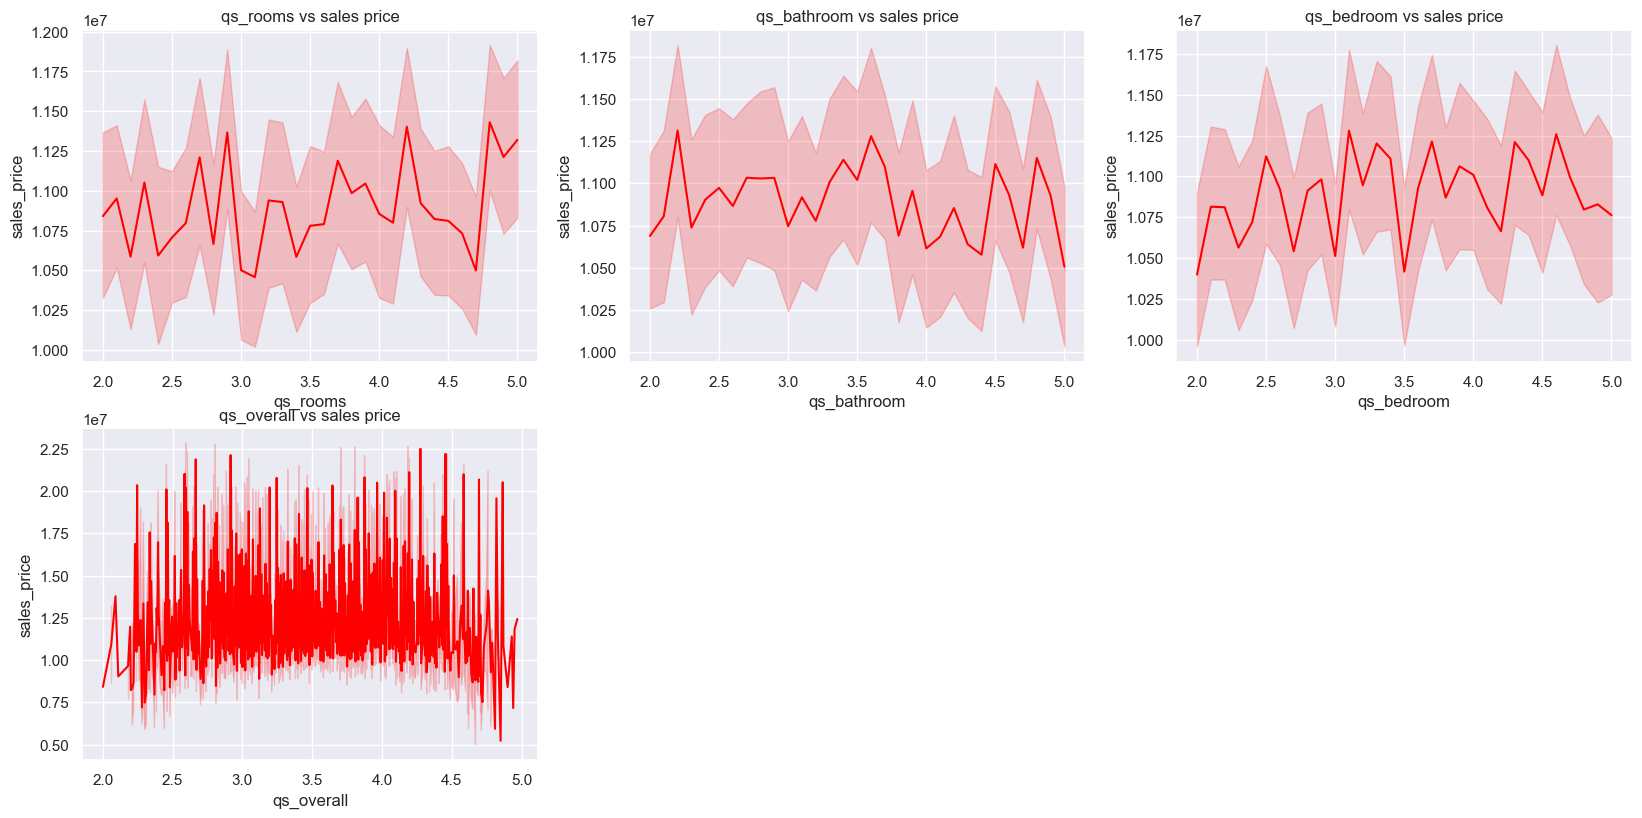

In [41]:
# now let's check the masked columns with sales price

plt.figure(figsize=(20,25))
plt.subplot(531)
sns.lineplot(df['qs_rooms'],df['sales_price'],color='red')
plt.title('qs_rooms vs sales price')

plt.subplot(532)
sns.lineplot(df['qs_bathroom'],df['sales_price'],color='red')
plt.title('qs_bathroom vs sales price')

plt.subplot(533)
sns.lineplot(df['qs_bedroom'],df['sales_price'],color='red')
plt.title('qs_bedroom vs sales price')

plt.subplot(534)
sns.lineplot(df['qs_overall'],df['sales_price'],color='red')
plt.title('qs_overall vs sales price')

In [42]:
# let's delete the non linear columns from the dataset

del df['sale_cond']
del df['qs_rooms']
del df['qs_bedroom']
del df['qs_bathroom']
del df['qs_overall']
del df['dist_mainroad']

In [43]:
# now let's use the label/one hot encoding the categorical datas according to the plotting

df['area'] = df['area'].map({'Karapakkam':0,'Adyar':1,'Chrompet':2,'Velachery':3,'KK Nagar':4,'Anna Nagar':5,'T Nagar':6})
df['park_facil'] = df['park_facil'].map({'No':0,'Yes':1})
df['utility_avail'] = df['utility_avail'].map({'ELO':0,'No Sewer':1,'AllPub':2})
df['street'] =df['street'].map({'No Access':0,'Paved':1,'Gravel':2})
df['mzzone'] = df['mzzone'].map({'A':0,'C':1,'I':2,'RH':4,'RL':5,'RM':6})
df = pd.get_dummies(df, columns = ['buildtype'])

In [44]:
df.head()

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,utility_avail,street,mzzone,sales_price,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,1,1,3,1,2,1,0,7600000,44,1,0,0
1,5,1986,2,1,5,0,2,2,4,21717770,11,1,0,0
2,1,909,1,1,3,1,0,2,5,13159200,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,9630290,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,7406250,30,0,0,1


# MACHINE LEARNING

In [45]:
# importing machine learning models

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [46]:
# splitting the datas for features and for target

x = df.drop('sales_price', axis=1)
y = df['sales_price']

In [47]:
x

,area,int_sqft,n_bedroom,n_bathroom,n_room,park_facil,utility_avail,street,mzzone,house_age,buildtype_Commercial,buildtype_House,buildtype_Others
0,0,1004,1,1,3,1,2,1,0,44,1,0,0
1,5,1986,2,1,5,0,2,2,4,11,1,0,0
2,1,909,1,1,3,1,0,2,5,20,1,0,0
3,3,1855,3,2,5,0,1,1,2,22,0,0,1
4,0,1226,1,1,3,1,2,2,1,30,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,0,598,1,1,2,0,0,0,6,49,0,0,1
7105,3,1897,3,2,5,1,1,0,4,9,0,0,1
7106,3,1614,2,1,4,0,1,2,2,28,0,1,0
7107,0,787,1,1,2,1,0,1,5,32,1,0,0


In [48]:
y

0        7600000
1       21717770
2       13159200
3        9630290
4        7406250
          ...   
7104     5353000
7105    10818480
7106     8351410
7107     8507000
7108     9976480
Name: sales_price, Length: 7109, dtype: int64

In [49]:
# here we import the neccessary packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [50]:
# let's split the datas fro training and testing

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(5687, 13) (1422, 13) (5687,) (1422,)


# LINEAR REGRESSION

In [51]:
linear_model = LinearRegression(fit_intercept=True)
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)
y_pred_rounded = [round(i) for i in y_pred]
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred_rounded})

,Actual,Predicted
457,12948200,13024011
1876,7524750,7529156
6307,16434500,17055565
3182,6705750,6288376
1188,15831550,14393495
...,...,...
6399,9774800,10699559
1677,8882720,8870960
1634,12520250,13164685
1839,8188000,8304680


In [52]:
# let's do evaluation

linear_model.score(x_test, y_test)

0.919986262818188

In [53]:
# now let's cross validate this model

from sklearn.model_selection import cross_val_score

lin_mod_cross_value = cross_val_score(linear_model, x_train, y_train, cv=10).mean()
lin_mod_cross_value

0.9175003907014274

## KNN regression

In [54]:
# in this model it's mandatory to scale the data.

from sklearn.preprocessing import StandardScaler
standardscalar = StandardScaler()
standardscalar.fit(x_train)
x_train_scaled = standardscalar.transform(x_train)
x_test_scaled = standardscalar.transform(x_test)

knn_values = np.arange(1,50)
knn_cross_value = []
for k in knn_values:
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    knn_regressor.fit(x_train_scaled, y_train)
    knn_score = knn_regressor.score(x_train_scaled, y_train)
    cv_score = cross_val_score(knn_regressor, x_train_scaled, y_train,cv=10).mean()
    result = {
        'k_value':k,
        'train_score':knn_score,
        'cross_val_score':cv_score
    }
    knn_cross_value.append(result)
m1 = pd.DataFrame(knn_cross_value)   

In [55]:
m1

,k_value,train_score,cross_val_score
0,1,1.000000,0.934160
1,2,0.984344,0.947604
2,3,0.978094,0.951713
3,4,0.974317,0.952996
4,5,0.971229,0.951950
5,6,0.967967,0.951188
6,7,0.965926,0.950903
7,8,0.964137,0.950426
8,9,0.962836,0.949598
9,10,0.961160,0.948473


In [58]:
best_row = m1.loc[m1['cross_val_score'].idxmax()]
knn_regressor_cross_value = best_row['cross_val_score']
print('BEST K VALUE : ',int(best_row['k_value']) ,' CORRESPONDING CROSS VALUE SCORE : ',knn_regressor_cross_value)

BEST K VALUE :  4  CORRESPONDING CROSS VALUE SCORE :  0.9529963961086526


In [59]:

# implementing K-nearest neighbor

knn_regressor = KNeighborsRegressor(n_neighbors=4)
knn_regressor.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=4)

In [60]:
knn_regressor_cross_value = cross_val_score(knn_regressor, x_train_scaled, y_train,cv=10).mean()
knn_regressor_cross_value

0.9529963961086526

## DECISION TREE regression

In [61]:
max_depth = np.arange(1,21)
decision_cross_value = []
for d in max_depth:
    dt_regressor = DecisionTreeRegressor(max_depth=d, random_state=42)
    dt_regressor.fit(x_train, y_train)
    decision_score = dt_regressor.score(x_train, y_train)
    cv_score = cross_val_score(dt_regressor, x_train, y_train, cv=10).mean()
    result = {
        'max_depth':d,
        'train_score':decision_score,
        'cross_value_score':cv_score
    }
    decision_cross_value.append(result)
m2 = pd.DataFrame(decision_cross_value)

In [62]:
m2

,max_depth,train_score,cross_value_score
0,1,0.361420,0.358739
1,2,0.689246,0.687142
2,3,0.807521,0.804659
3,4,0.888919,0.884623
4,5,0.923126,0.915888
5,6,0.945066,0.937536
6,7,0.960670,0.950559
7,8,0.973248,0.961305
8,9,0.982795,0.967938
9,10,0.989463,0.971185


In [63]:
best_row = m2.loc[m2['cross_value_score'].idxmax()]
decision_tree_cross_value = best_row['cross_value_score']
print('max_depth : ',int(best_row['max_depth']),' corresponding cross value score : ',decision_tree_cross_value)

max_depth :  12  corresponding cross value score :  0.9734413724078568


In [64]:

# implementing the max_depth

dt_regressor = DecisionTreeRegressor(max_depth=12, random_state=42)
dt_regressor.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=12, random_state=42)

In [65]:
decision_tree_cross_value = cross_val_score(dt_regressor, x_train, y_train, cv=10).mean()
decision_tree_cross_value

0.9734413724078568

## RANDOM FOREST regression

In [66]:
max_depth = 20
ran_cross_value = []
for d in range(1,max_depth,2):
    rf_regressor = RandomForestRegressor(max_depth=d, random_state=42)
    rf_regressor.fit(x_train, y_train)
    ran_for_score = rf_regressor.score(x_train, y_train)
    cv_score = cross_val_score(rf_regressor, x_train, y_train, cv=10).mean()
    result ={
        'max_depth':d,
        'train_score':ran_for_score,
        'cross_value_score':cv_score
    }
    ran_cross_value.append(result)
m3 = pd.DataFrame(ran_cross_value)

In [67]:
m3

,max_depth,train_score,cross_value_score
0,1,0.361419,0.358720
1,3,0.811122,0.810632
2,5,0.934597,0.929314
3,7,0.972882,0.966396
4,9,0.989981,0.982182
5,11,0.996223,0.987160
6,13,0.998006,0.988310
7,15,0.998387,0.988508
8,17,0.998451,0.988539
9,19,0.998450,0.988546


In [68]:
best_row = m3.loc[m3['cross_value_score'].idxmax()]
rand_for_cross_value = best_row['cross_value_score']
print('max_depth : ',best_row['max_depth'],' corresponding cross value score : ',rand_for_cross_value)

max_depth :  19.0  corresponding cross value score :  0.98854552329146


In [69]:

# implementing max_depth in random_forest

rf_regressor = RandomForestRegressor(max_depth=19, random_state=42)
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=19, random_state=42)

In [70]:
rand_for_cross_value = cross_val_score(rf_regressor, x_train, y_train, cv=10).mean()
rand_for_cross_value

0.98854552329146

## XGBOOST

In [71]:
value = []
for i in range(21):
    dec_val = i*0.05
    if dec_val <= 1.0:
        for_dec_val = "{:.2f}".format(dec_val)
        value.append(float(for_dec_val))
xgboost_cross_value = []
for lr in value:
    xgb_regressor = xgb.XGBRegressor(learning_rate = lr, n_estimators=100)
    xgb_regressor.fit(x_train, y_train)
    xgboost_score = xgb_regressor.score(x_train, y_train)
    cv_score = cross_val_score(xgb_regressor, x_train, y_train, cv=10).mean()
    result = {
        'learning_rate':lr,
        'train score':xgboost_score,
        'cross_value_score':cv_score
    }
    xgboost_cross_value.append(result)
m4 = pd.DataFrame(xgboost_cross_value)

In [72]:
m4

,learning_rate,train score,cross_value_score
0,0.00,-9.103829e-15,-0.001758
1,0.05,9.944935e-01,0.990917
2,0.10,9.971899e-01,0.993961
3,0.15,9.977441e-01,0.994104
4,0.20,9.979310e-01,0.993928
5,0.25,9.981297e-01,0.993622
6,0.30,9.983360e-01,0.992900
7,0.35,9.985182e-01,0.992571
8,0.40,9.986873e-01,0.992137
9,0.45,9.986180e-01,0.991467


In [73]:
best_row = m4.loc[m4['cross_value_score'].idxmax()]
xgboost_cross_value = best_row['cross_value_score']
print('learning_rate : ',best_row['learning_rate'],' corresponding_cross_value_score : ',xgboost_cross_value)

learning_rate :  0.15  corresponding_cross_value_score :  0.9941037361791322


In [84]:

# implementing learning rate

xgb_regressor = xgb.XGBRegressor(learning_rate=0.15,n_estimators=100)
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [85]:
xgboost_cross_value = cross_val_score(xgb_regressor, x_train, y_train, cv=10).mean()
xgboost_cross_value

0.9941037361791322

## Cross Value Scores

In [75]:

# cross value score for all models

print('cross value score for linear regression model          : ',lin_mod_cross_value)
print('cross value score for knn regression model             : ',knn_regressor_cross_value)
print('cross value score for decision tree regression model   : ',decision_tree_cross_value)
print('cross value score for random forest regression model   : ',rand_for_cross_value)
print('cross value score for xgboost regression model         : ',xgboost_cross_value)

cross value score for linear regression model          :  0.9175003907014274
cross value score for knn regression model             :  0.9529963961086526
cross value score for decision tree regression model   :  0.9734413724078568
cross value score for random forest regression model   :  0.98854552329146
cross value score for xgboost regression model         :  0.9941037361791322


## R2 Scores

In [81]:
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.metrics import r2_score

y_pred_lr = linear_model.predict(x_test)
y_pred_knn = knn_regressor.predict(x_test)
y_pred_dt = dt_regressor.predict(x_test)
y_pred_rf = rf_regressor.predict(x_test)
y_pred_xgb = xgb_regressor.predict(x_test)


R2_score_lr = r2_score(y_test,y_pred_lr)
R2_score_knn = r2_score(y_test,y_pred_knn)
R2_score_dt = r2_score(y_test,y_pred_dt)
R2_score_rf = r2_score(y_test,y_pred_rf)
R2_score_xgb = r2_score(y_test,y_pred_xgb)

In [ ]:


# R2 scores for all models

print('R2 score for linear regression model          : ',R2_score_lr)
print('R2 score for knn regression model             : ',R2_score_knn)
print('R2 score for decision tree regression model   : ',R2_score_dt)
print('R2 score for random forest regression model   : ',R2_score_rf)
print('R2 score for xgboost regression model         : ',R2_score_xgb)

## feature importance plotting

In [86]:
df.columns

Index(['area', 'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room', 'park_facil',
       'utility_avail', 'street', 'mzzone', 'sales_price', 'house_age',
       'buildtype_Commercial', 'buildtype_House', 'buildtype_Others'],
      dtype='object')

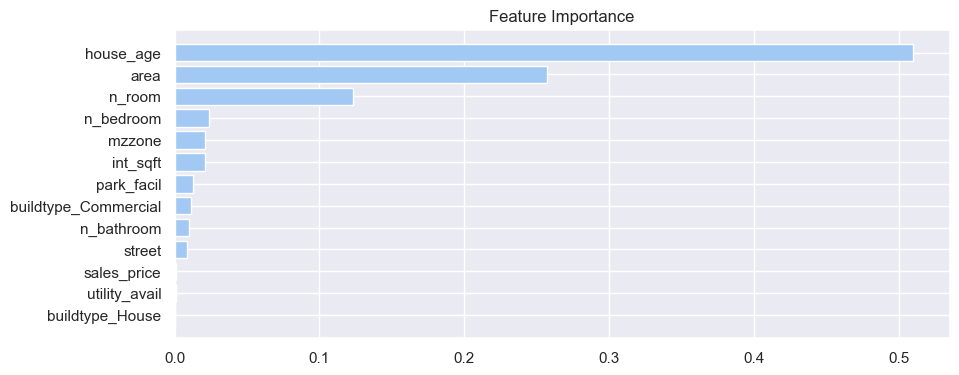

In [93]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,4))
plt.barh(df.columns[sorted_idx],xgb_regressor.feature_importances_[sorted_idx])
plt.title('Feature Importance')
plt.show()